In [1]:
from pathlib import Path

def load_dataset() -> list:
    """Loads dataset from cached feature folder.

    @returns: list of paths to audio files
    """
    features_path = Path("../data/features/mel_spectrogram").resolve()
    return [f for f in features_path.glob("**/*.npy")]

In [2]:
metadata = load_dataset()

In [3]:
import pandas as pd

wavs_df = pd.DataFrame([])
wavs_df['feature_path'] = [m for m in metadata]
wavs_df['dialect'] = wavs_df['feature_path'].apply(lambda x: x.parent.name)

In [4]:
wavs_df.head()

,feature_path,dialect
0,/home/vin/Projects/medhok/data/features/mel_sp...,Ngadas
1,/home/vin/Projects/medhok/data/features/mel_sp...,Ngadas
2,/home/vin/Projects/medhok/data/features/mel_sp...,Ngadas
3,/home/vin/Projects/medhok/data/features/mel_sp...,Ngadas
4,/home/vin/Projects/medhok/data/features/mel_sp...,Ngadas


In [5]:
wavs_df['feature_path'].loc[0]

PosixPath('/home/vin/Projects/medhok/data/features/mel_spectrogram/Ngadas/Marsam-mel_spectrogram-485.npy')

In [6]:
wavs_sample_df = wavs_df.sample(frac=0.3).reset_index().drop('index', axis=1)
# wavs_sample_df = wavs_df

In [7]:
wavs_sample_df.sort_values(by='dialect')

,feature_path,dialect
8528,/home/vin/Projects/medhok/data/features/mel_sp...,Banten
6384,/home/vin/Projects/medhok/data/features/mel_sp...,Banten
6382,/home/vin/Projects/medhok/data/features/mel_sp...,Banten
6381,/home/vin/Projects/medhok/data/features/mel_sp...,Banten
6380,/home/vin/Projects/medhok/data/features/mel_sp...,Banten
...,...,...
2064,/home/vin/Projects/medhok/data/features/mel_sp...,Tengger
6507,/home/vin/Projects/medhok/data/features/mel_sp...,Tengger
4536,/home/vin/Projects/medhok/data/features/mel_sp...,Tengger
13967,/home/vin/Projects/medhok/data/features/mel_sp...,Tengger


In [8]:
wavs_sample_df['dialect'].values.reshape(-1, 1)

array([['Solo'],
       ['Solo'],
       ['Madiun'],
       ...,
       ['Ranu Pane'],
       ['Banten'],
       ['Semarang']], dtype=object)

In [9]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(wavs_sample_df['dialect'].values.reshape(-1, 1))

onehot_encoder.categories_

[array(['Banten', 'Banyumas', 'Cirebon', 'Kediri', 'Lumajang', 'Madiun',
        'Malang', 'Ngadas', 'Osing', 'Papua', 'Pemalang', 'Ranu Pane',
        'Semarang', 'Solo', 'Tegal', 'Tengger'], dtype=object)]

In [10]:
onehot_encoder.transform([['Ngadas']]).dtype

dtype('float64')

In [11]:
wavs_sample_df['dialect'].values.reshape(-1, 1)

array([['Solo'],
       ['Solo'],
       ['Madiun'],
       ...,
       ['Ranu Pane'],
       ['Banten'],
       ['Semarang']], dtype=object)

In [12]:
dialects_onehot = onehot_encoder.transform(wavs_sample_df['dialect'].values.reshape(-1, 1))

In [13]:
dialects_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
dialects_onehot.dtype

dtype('float64')

In [15]:
wavs_sample_df.shape[0]

17058

In [16]:
# Saving dialect one-hot encoder to '../model/dialects_encoder.pkl'
# import pickle

# with open('../model/dialects-encoder.pkl', 'wb') as f:
#     pickle.dump(onehot_encoder, f)

In [17]:
import numpy as np

features = np.empty((wavs_sample_df.shape[0], 128, 501, 1), dtype=np.float32)
for i, f in enumerate(wavs_sample_df['feature_path']):
    print(f'{i + 1}/{len(wavs_sample_df)}', end='\r')
    # features.append(np.load(f))
    features[i, ] = np.load(f)[:, :, np.newaxis]

In [18]:
np.isnan(features).any()

False

In [19]:
np.argwhere(np.isnan(features))

array([], shape=(0, 4), dtype=int64)

In [20]:
features[1278, :, :, :]

array([[[-0.5331689 ],
        [-0.6130791 ],
        [-0.4576631 ],
        ...,
        [-0.78934246],
        [-0.7821333 ],
        [-0.57576776]],

       [[-0.5312264 ],
        [-0.6130465 ],
        [-0.45766306],
        ...,
        [-0.7893358 ],
        [-0.78133523],
        [-0.4834645 ]],

       [[-0.5313343 ],
        [-0.613025  ],
        [-0.45766133],
        ...,
        [-0.789265  ],
        [-0.7817045 ],
        [-0.5194487 ]],

       ...,

       [[-0.53294826],
        [-0.61308116],
        [-0.4576631 ],
        ...,
        [-0.78934705],
        [-0.7826559 ],
        [-0.63592434]],

       [[-0.53300196],
        [-0.6130819 ],
        [-0.4576631 ],
        ...,
        [-0.78934705],
        [-0.78265685],
        [-0.6360377 ]],

       [[-0.5330135 ],
        [-0.613082  ],
        [-0.4576631 ],
        ...,
        [-0.78934705],
        [-0.78265697],
        [-0.63606286]]], dtype=float32)

In [21]:
np.unique(np.argwhere(np.isnan(features))[:, 0])

array([], dtype=int64)

In [22]:
wavs_sample_df['feature_path'].loc[1278]

PosixPath('/home/vin/Projects/medhok/data/features/mel_spectrogram/Ngadas/Marsam-mel_spectrogram-428.npy')

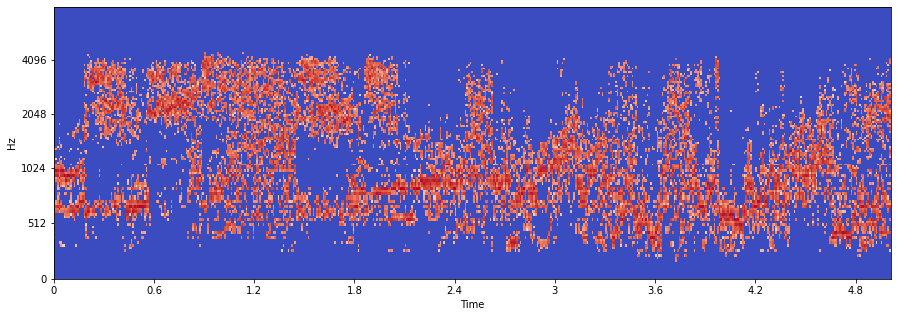

In [24]:
import librosa
from librosa import display
from matplotlib import pyplot as plt

_sample_feat = features[253].squeeze()
_sample = librosa.power_to_db(_sample_feat)
plt.figure(figsize=(15, 5))
display.specshow(_sample, sr=16000, hop_length=160, x_axis='time', y_axis='mel')

In [25]:
from pympler.asizeof import asizeof
f'Loaded dataset size in RAM: {asizeof(features) / 1e9:2.2f} GB'

'Loaded dataset size in RAM: 4.38 GB'

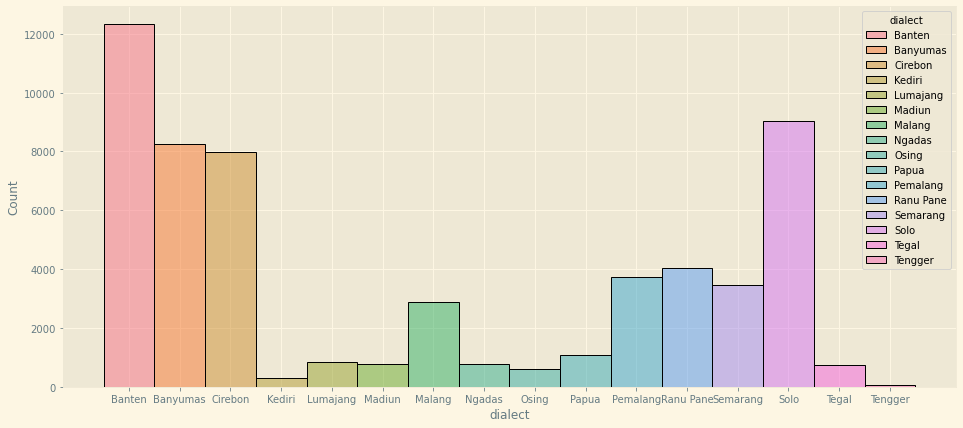

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('Solarize_Light2')

plt.figure(figsize=(16, 7))
sns.histplot(wavs_df.sort_values(by='dialect'), x='dialect', hue='dialect')

plt.show()

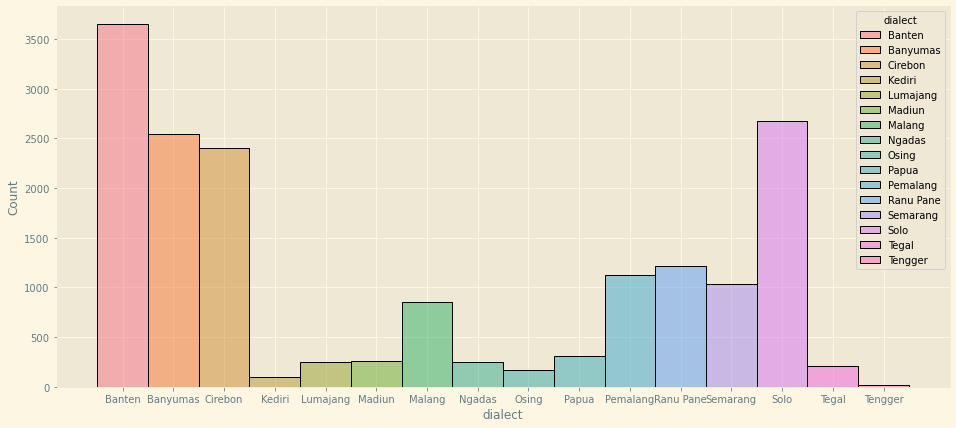

In [27]:
plt.figure(figsize=(16, 7))
sns.histplot(wavs_sample_df.sort_values(by='dialect'), x='dialect', hue='dialect')

plt.show()

In [28]:
print("Mel spectrogram data shape: {}".format(features.shape))
print("Dialects data shape: {}".format(wavs_sample_df['dialect'].values.shape))

Mel spectrogram data shape: (17058, 128, 501, 1)
Dialects data shape: (17058,)


In [29]:
wavs_sample_df

,feature_path,dialect
0,/home/vin/Projects/medhok/data/features/mel_sp...,Solo
1,/home/vin/Projects/medhok/data/features/mel_sp...,Solo
2,/home/vin/Projects/medhok/data/features/mel_sp...,Madiun
3,/home/vin/Projects/medhok/data/features/mel_sp...,Solo
4,/home/vin/Projects/medhok/data/features/mel_sp...,Pemalang
...,...,...
17053,/home/vin/Projects/medhok/data/features/mel_sp...,Banten
17054,/home/vin/Projects/medhok/data/features/mel_sp...,Solo
17055,/home/vin/Projects/medhok/data/features/mel_sp...,Ranu Pane
17056,/home/vin/Projects/medhok/data/features/mel_sp...,Banten


In [30]:
from sklearn.model_selection import train_test_split

X_mel_train, X_mel_test, y_train, y_test = train_test_split(
    features,
    dialects_onehot,
    train_size=0.8,
    random_state=42
)

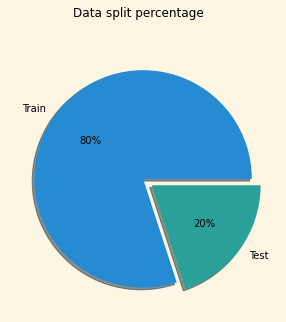

In [31]:
# Distribution of data overall

plt.figure(figsize=(5, 5))
plt.suptitle('Data split percentage')
plt.pie([X_mel_train.shape[0], X_mel_test.shape[0]], explode=[0.0, 0.1], labels=['Train', 'Test'], shadow=True, autopct='%2.f%%')

plt.show()

In [32]:
X_mel_train[0].squeeze().shape

(128, 501)

/tmp/ipykernel_265743/1290499687.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


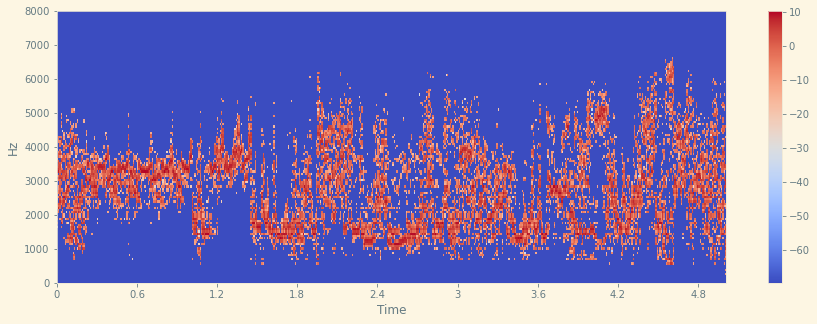

(128, 501, 1)

In [33]:
from librosa.core import power_to_db
from librosa.display import specshow

# Rough illustration
plt.figure(figsize=(15, 5))
plt.grid(False)
specshow(power_to_db(X_mel_train[0].squeeze()), y_axis='linear', x_axis='time', sr=16000, hop_length=160, cmap='coolwarm')
plt.colorbar()
plt.show()

X_mel_train[0].shape

In [34]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [35]:
import tensorflow as tf

# Checking for GPU availability. If shown none, set up CUDA+cuDNN
tf.config.list_physical_devices('GPU')

2022-03-11 18:06:46.567562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2022-03-11 18:06:46.614007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 18:06:46.614313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [36]:
tf.keras.backend.clear_session()

# TODO: add hidden layers, or use dropout
def create_model(feature='mel_spec', arch='cnn'):
    """
    Creates a TensorFlow model.
    :param feature: Audio feature used. Defaults to Mel spectrogram
    :param arch: Neural network architecture used. Defaults to CNN.
    :return: tensorflow.keras.Model
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(128, 501, 1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        # tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(16, activation=tf.nn.softmax)
    ])
    # Input
    # if feature == 'mel_spec':
    #     model.add(tf.keras.layers.Conv2D)
    # # Arch
    # if arch == 'cnn':
    #     model.add(tf.keras.layers.Conv2D)
    return model

model_mel_spec_cnn = create_model(feature='mel_spec', arch='cnn')
model_mel_spec_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 499, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 249, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 247, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 123, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 121, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 60, 128)      0

2022-03-11 18:06:46.713639: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-11 18:06:46.714560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 18:06:46.715497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 18:06:46.716579: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [37]:
import tensorflow_addons as tfa

model_mel_spec_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    # optimizer=tf.keras.optimizers.RMSprop(),
    # optimizer='adam',
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[
        # tf.keras.metrics.Accuracy(),
        tf.keras.metrics.CategoricalAccuracy(),
        # tf.keras.metrics.Precision(),
        # tf.keras.metrics.Recall(),
        # tfa.metrics.F1Score(num_classes=16)
    ]
)

In [38]:
# from medhok import constants as c

# ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
#         filepath=c.CHECKPOINT_DIR / ('model_' +
#         'mel_spectrogram-cnn-nb' + '/'),
#         save_weights_only=True,
#         verbose=1
#     )

In [39]:
X_mel_train.shape

(13646, 128, 501, 1)

In [40]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [41]:
type(y_train)

numpy.ndarray

In [42]:
y_train = y_train.astype(int)

In [43]:
f'Input dtypes: {X_mel_train.dtype} and {y_train.dtype}'

'Input dtypes: float32 and int64'

In [44]:
# Training step.

history = model_mel_spec_cnn.fit(
    x=X_mel_train,
    y=y_train,
    batch_size=16, # 64
    epochs=150,
    # validation_data=(X_mel_test, y_test.astype(np.uint8)),
    steps_per_epoch=128,
    # callbacks=[ckpt_callback]
)

2022-03-11 18:06:56.084503: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3500362752 exceeds 10% of free system memory.
2022-03-11 18:06:58.007887: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3500362752 exceeds 10% of free system memory.


Epoch 1/150


2022-03-11 18:07:01.165581: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8302
2022-03-11 18:07:02.622326: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-03-11 18:07:02.622399: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-03-11 18:07:02.685543: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory

128/128 [==============================] - 10s 43ms/step - loss: 2.1352 - categorical_accuracy: 0.2651
Epoch 2/150
128/128 [==============================] - 5s 42ms/step - loss: 1.8237 - categorical_accuracy: 0.3833
Epoch 3/150
128/128 [==============================] - 5s 42ms/step - loss: 1.6210 - categorical_accuracy: 0.4731
Epoch 4/150
128/128 [==============================] - 5s 42ms/step - loss: 1.4930 - categorical_accuracy: 0.5127
Epoch 5/150
128/128 [==============================] - 5s 42ms/step - loss: 1.3995 - categorical_accuracy: 0.5371
Epoch 6/150
128/128 [==============================] - 5s 42ms/step - loss: 1.2771 - categorical_accuracy: 0.5781
Epoch 7/150
128/128 [==============================] - 6s 45ms/step - loss: 1.2545 - categorical_accuracy: 0.5890
Epoch 8/150
128/128 [==============================] - 5s 42ms/step - loss: 1.1685 - categorical_accuracy: 0.6089
Epoch 9/150
128/128 [==============================] - 5s 42ms/step - loss: 1.1222 - categorical_ac

KeyboardInterrupt: 

In [37]:
X_mel_train[0].shape

(128, 501, 1)

In [39]:
X_mel_train[:2].shape

(2, 128, 501, 1)

In [45]:
model_mel_spec_cnn.predict([X_mel_test[0].tolist()])

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]], dtype=float32)

In [42]:
X_mel_test[0]

array([[[[-0.51116824],
         [-0.5758514 ],
         [-0.6205107 ],
         ...,
         [-0.57134384],
         [-0.605333  ],
         [-0.3761852 ]],

        [[-0.502224  ],
         [-0.5757716 ],
         [-0.62051046],
         ...,
         [-0.5713438 ],
         [-0.60528535],
         [-0.3694123 ]],

        [[-0.5033508 ],
         [-0.57579154],
         [-0.6205103 ],
         ...,
         [-0.57134354],
         [-0.60528475],
         [-0.3695703 ]],

        ...,

        [[-0.51730293],
         [-0.57590616],
         [-0.6205108 ],
         ...,
         [-0.5713439 ],
         [-0.6053656 ],
         [-0.38083243]],

        [[-0.51730335],
         [-0.57590616],
         [-0.6205108 ],
         ...,
         [-0.5713439 ],
         [-0.6053656 ],
         [-0.38083258]],

        [[-0.51730347],
         [-0.57590616],
         [-0.6205108 ],
         ...,
         [-0.5713439 ],
         [-0.6053656 ],
         [-0.38083258]]]], dtype=float32)

In [ ]:
# Model visualisation - for now

fig, ax = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Plots of model performance')

ax[0].plot(history.history['loss'], 'r')
ax[0].plot(history.history['val_loss'], 'g')
ax[1].plot(history.history['categorical_accuracy'], 'r')
ax[1].plot(history.history['val_categorical_accuracy'], 'g')
ax[0].grid()
ax[1].grid()

plt.savefig('../visualization/1-model-performance.png')
plt.show()

In [ ]:
# TODO: data augmentation, regularisation

In [ ]:
onehot.categories_[0][0]

In [ ]:
metrics = model_mel_spec_cnn.evaluate(X_mel_test, y_test)
print("""Model training validation result:
Loss\t\t: {},
Accuracy\t: {},
Precision\t: {},
Recall\t\t: {},

F1 score per categories:""".format(
    metrics[0], metrics[1], metrics[2], metrics[3]
))
for i in range(len(metrics[4])):
    print('\t' + onehot.categories_[0][i] + ':', str(metrics[4][i]))

In [ ]:
# Saving model.
model_mel_spec_cnn.save('../model/model_mel_spec_cnn_nb')
model_mel_spec_cnn.save_weights('../model/weights/model_mel_spec_cnn_nb/')